In [3]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 4.9 MB/s 


In [4]:
!pip install flashtext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9307 sha256=761ac52a3c6cd76cb12249cb861eea345eb68242e6342312c3279f5f4382344e
  Stored in directory: /root/.cache/pip/wheels/8d/62/8b/71813348245ae1bcbae179193bbc72db819e8057e89298a6ac
Successfully built flashtext


In [5]:
!pip install nlp-id

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.9 MB 4.8 MB/s 
     |████████████████████████████████| 31.0 MB 1.5 MB/s 
     |████████████████████████████████| 1.5 MB 51.2 MB/s 
  Created wheel for nlp-id: filename=nlp_id-0.1.13.0-py3-none-any.whl size=8074943 sha256=0949bbecd284038096917e494ed5c2cd53d6505c497220bdbc6de5f4e223e2ca
  Stored in directory: /root/.cache/pip/wheels/c9/40/1e/1f65670842151a87e008b5df647bf5d8b034e762e1934fd7f3
  Created wheel for nltk: filename=nltk-3.4.5-py3-none-any.whl size=1449921 sha256=c5c2e4f0aaba56bc39004ede2422cfd62b75bc6a5bb0c2434f7b53985a9c951e
  Stored in directory: /root/.cache/pip/wheels/23/18/48/8fd6ec11da38406b309470566d6f099c04805d2ec61d7829e7
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=409bc350cef72f1e059cfcbeaea63ae829563e47f33e551bef2e36fa136ca178
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837

In [6]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 2.8 MB/s 
  Using cached pybind11-2.10.2-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp38-cp38-linux_x86_64.whl size=3133675 sha256=281abb4359b6c53a775fba20c8d284c5b03c76b25c0987afb36d19a40269d501
  Stored in directory: /root/.cache/pip/wheels/93/61/2a/c54711a91c418ba06ba195b1d78ff24fcaad8592f2a694ac94
Successfully built fasttext


In [62]:
import pandas as pd
import re
from unidecode import unidecode
import numpy as np
import scipy
import string
import fasttext
import matplotlib.pyplot as plt
import seaborn as sns
from flashtext import KeywordProcessor 
from nlp_id.tokenizer import Tokenizer 
from nlp_id.stopword import StopWord 
from nlp_id.lemmatizer import Lemmatizer 
from wordcloud import WordCloud

## Text Cleansing

Input Data

In [8]:
df = pd.read_csv ('https://raw.githubusercontent.com/IndoNLP/indonlu/master/dataset/smsa_doc-sentiment-prosa/train_preprocess.tsv', 
                 sep='\t', names=['text', 'label'], header=None)
df.head()

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


Duplicates and Missing Values


In [9]:
#Total of duplications
df.duplicated().sum()

67

In [10]:
#Locating duplicates
df.loc[df.duplicated(), :]

,text,label
948,berantakan,negative
1205,jangan pernah kecewa dengan apa yang diberikan...,positive
1367,bersyukur,positive
2616,apresiasi,positive
2708,tidak berantakan,positive
...,...,...
10927,tidak indah,negative
10950,bank bca di pgc payah sekali pelayanan nya . j...,negative
10979,berkesempatan menikmati santap pagi dikarenaka...,positive
10995,tidak kecewa,positive


In [11]:
#Checking duplicate sample
df[df['text'] == 'tidak indah']

,text,label
10815,tidak indah,negative
10927,tidak indah,negative


In [12]:
#Deleting duplicates
df = df.drop_duplicates(keep='last')
df.shape

(10933, 2)

##Language Detection Analysis

Citations:

[1] A. Joulin, E. Grave, P. Bojanowski, T. Mikolov, Bag of Tricks for Efficient Text Classification

[2] A. Joulin, E. Grave, P. Bojanowski, M. Douze, H. Jégou, T. Mikolov, FastText.zip: Compressing text classification models

In [13]:
#Language detection using
pretrained_model = "/content/drive/MyDrive/Colab Notebooks/Dataset/lid.176.ftz" 
model = fasttext.load_model(pretrained_model)
langs = []
for sent in df['text']:
    lang = model.predict(sent)[0]
    langs.append(str(lang)[11:13])
df['language'] = langs

df.head()

,text,label,language
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,id
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,id
2,lokasi strategis di jalan sumatera bandung . t...,positive,id
3,betapa bahagia nya diri ini saat unboxing pake...,positive,id
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,id


In [14]:
lang = pd.DataFrame(df.groupby(['language'])['language'].count())
lang #language based on ISO 639-1 Code

,language
language,
bs,1
ca,5
ce,1
da,1
de,23
en,144
eo,8
es,12
et,2


In [23]:
lang2 = lang.rename({'language': 'lang', 'language': 'total'}, axis='columns')
lang2

,total
language,
bs,1
ca,5
ce,1
da,1
de,23
en,144
eo,8
es,12
et,2


In [24]:
lang2.to_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/lang.csv')

In [25]:
lang3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/lang.csv')
lang3

,lang,total
0,bs,1
1,ca,5
2,ce,1
3,da,1
4,de,23
5,en,144
6,eo,8
7,es,12
8,et,2
9,eu,6


Splitting based on languages

In [30]:
df_lang1 = df.loc[(df['language']=="id")]
df_lang1

,text,label,language
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,id
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,id
2,lokasi strategis di jalan sumatera bandung . t...,positive,id
3,betapa bahagia nya diri ini saat unboxing pake...,positive,id
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,id
...,...,...,...
10994,tidak bosan,positive,id
10995,tidak kecewa,positive,id
10996,enak rasa masakan nya apalagi kepiting yang me...,positive,id
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative,id


In [31]:
df_lang2 = df.loc[(df['language']=="en")]
df_lang2

,text,label,language
19,sgwr 2018 beri dampak positif terhadap hobi an...,positive,en
98,"hasil quick count pilgub kaltim 2018 , isran -...",neutral,en
192,prediksi persija jakarta vs psis semarang 18 s...,neutral,en
209,takut,negative,en
310,"pks backing nya tuhan , partai abang backing n...",negative,en
...,...,...,...
10432,minyak jarak - castor oil 1000 ml,neutral,en
10702,warga as beramai-ramai mengungsi jelang badai ...,neutral,en
10713,sombong,negative,en
10844,shampo head and shoulders mahal banget,negative,en


In [32]:
df_lang3 = df.loc[(df['language']=="ms")]
df_lang3

,text,label,language
29,malu - maluin nih oknum yang tidak bertanggung...,negative,ms
50,mardani ali sera : kemenangan di sosial media ...,neutral,ms
58,bikin macet saja nih orang,negative,ms
114,sebenarnya barang kw juga banyak yang bagus ku...,positive,ms
158,saya tidak suka beliau jokowi yang masih jadi ...,negative,ms
...,...,...,...
10836,ledakan dalam aksi protes di afghanistan tewas...,neutral,ms
10838,"terletak di trans studio mal , jalan gatot sub...",positive,ms
10871,alah indosat jaringan seperti tahi bikin kesal...,negative,ms
10978,pdip tidak senang bila nkri damai beragam sih !,negative,ms


In [33]:
df_lang4 = df.loc[(df['language']=="de")]
df_lang4

,text,label,language
632,hina,negative,de
1037,gue mau spam indosat bodoamat gue mau marah,negative,de
1212,"wah , seneng deh lihat perkembangan indonesia ...",positive,de
1652,jumat malam bandung selalu macet banget,negative,de
1912,macet,negative,de
1948,goblok fpi bangsat terrorist,negative,de
2740,gelisah,negative,de
3014,pala lo peang polri berjihad . dasar cebong bodo,negative,de
3023,giri kiemas unggul di pilkada sumsel versi cha...,neutral,de
3138,budidaya lele memang bikin untung,positive,de


In [34]:
df_lang5 = df.loc[(df['language']=="jv")]
df_lang5

,text,label,language
467,yuk ikutan,neutral,jv
5646,adit kayak tarik,negative,jv
7816,rusmadi duduki posisi tertinggi hasil survei n...,neutral,jv
8217,macet bikin sakit perut,negative,jv


In [35]:
df_lang = pd.concat([df_lang1, df_lang2, df_lang3, df_lang4, df_lang5], ignore_index=True, sort=False)
df_lang

,text,label,language
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,id
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,id
2,lokasi strategis di jalan sumatera bandung . t...,positive,id
3,betapa bahagia nya diri ini saat unboxing pake...,positive,id
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,id
...,...,...,...
10770,bangsat,negative,de
10771,yuk ikutan,neutral,jv
10772,adit kayak tarik,negative,jv
10773,rusmadi duduki posisi tertinggi hasil survei n...,neutral,jv


Visualization based on Language

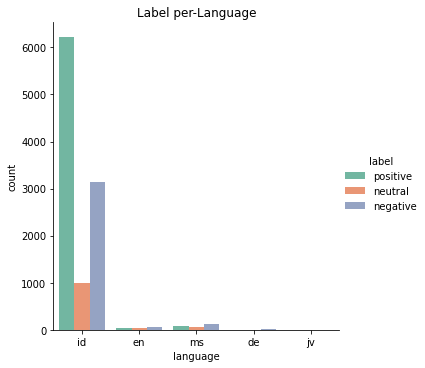

In [41]:
sns.catplot(data=df_lang, x="language", kind="count", hue="label", palette="Set2").set(title='Label per-Language')

##Count Analysis

Count total letters and words per-row before cleaning

In [42]:
df['LettersTotal'] = df.text.apply(len)

In [43]:
# Counting words in every row
def split_kalimat(text):
  return (len(text.split()))

df['WordsTotal'] = df['text'].apply(split_kalimat)
df.head()

,text,label,language,LettersTotal,WordsTotal
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,id,404,66
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,id,102,17
2,lokasi strategis di jalan sumatera bandung . t...,positive,id,184,33
3,betapa bahagia nya diri ini saat unboxing pake...,positive,id,93,17
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,id,214,38


Text Cleaning

In [44]:
df_1 = df

In [45]:
#Remove punctuations
def remove_punctuation(s):
    s = re.sub(r"\\x[A-Za-z0-9./]+", '', unidecode(s))
    return re.sub(r"[^\w\d\s]+","",s)

df_1['no_punct'] = df_1['text'].apply(remove_punctuation)
df.head()

,text,label,language,LettersTotal,WordsTotal,no_punct
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,id,404,66,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,id,102,17,mohon ulama lurus dan k212 mmbri hujjah partai...
2,lokasi strategis di jalan sumatera bandung . t...,positive,id,184,33,lokasi strategis di jalan sumatera bandung te...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,id,93,17,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,id,214,38,duh jadi mahasiswa jangan sombong dong kasih...


In [46]:
#Remove new line
def remove_newline(s):
    return s.strip().replace(r'\n'," ")

df_1['no_newline'] = df_1['no_punct'].apply(remove_newline)
df_1.head()

,text,label,language,LettersTotal,WordsTotal,no_punct,no_newline
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,id,404,66,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,id,102,17,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah partai...
2,lokasi strategis di jalan sumatera bandung . t...,positive,id,184,33,lokasi strategis di jalan sumatera bandung te...,lokasi strategis di jalan sumatera bandung te...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,id,93,17,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,id,214,38,duh jadi mahasiswa jangan sombong dong kasih...,duh jadi mahasiswa jangan sombong dong kasih...


In [47]:
#Remove multi-spaces
def remove_spaces(s):
    return  re.sub(' +', ' ',s)

df_1['no_multispace'] = df_1['no_newline'].apply(remove_spaces)
df_1.head()

,text,label,language,LettersTotal,WordsTotal,no_punct,no_newline,no_multispace
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,id,404,66,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,id,102,17,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah partai...
2,lokasi strategis di jalan sumatera bandung . t...,positive,id,184,33,lokasi strategis di jalan sumatera bandung te...,lokasi strategis di jalan sumatera bandung te...,lokasi strategis di jalan sumatera bandung tem...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,id,93,17,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,id,214,38,duh jadi mahasiswa jangan sombong dong kasih...,duh jadi mahasiswa jangan sombong dong kasih...,duh jadi mahasiswa jangan sombong dong kasih k...


In [48]:
#Remove Indonesian stopwords -> sw stopwords
def stopwords_remove(s):
    sw_id = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/Dataset/id_stopwords.csv', names=['sw'])
    list_sw = sw_id['sw'].to_list()
    s = s.split(" ") # merubah string menjadi list
    s = [x for x in s if x not in list_sw] # menghapus kata pada s, jika kata tersebut ada pada list_sw
    s = ' '.join(s) # menggabung list menjadi string, dipisah oleh spasi
    return s

df_1['no_stopwords'] = df_1['no_multispace'].apply(stopwords_remove)
df_1.head()

,text,label,language,LettersTotal,WordsTotal,no_punct,no_newline,no_multispace,no_stopwords
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,id,404,66,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,warung dimiliki pengusaha pabrik puluhan terke...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,id,102,17,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus k212 mmbri hujjah partai diw...
2,lokasi strategis di jalan sumatera bandung . t...,positive,id,184,33,lokasi strategis di jalan sumatera bandung te...,lokasi strategis di jalan sumatera bandung te...,lokasi strategis di jalan sumatera bandung tem...,lokasi strategis jalan sumatera bandung nya ny...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,id,93,17,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya unboxing paket barang nya b...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,id,214,38,duh jadi mahasiswa jangan sombong dong kasih...,duh jadi mahasiswa jangan sombong dong kasih...,duh jadi mahasiswa jangan sombong dong kasih k...,duh mahasiswa sombong kasih kartu kuning belaj...


In [49]:
#Replace slang words
alay_dict1 = pd.read_csv('https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv')
alay_dict = alay_dict1.groupby('formal')['slang'].apply(list).to_dict()

keyword_processor = KeywordProcessor()
keyword_processor.add_keywords_from_dict(alay_dict)

def _normalization(s):
    return keyword_processor.replace_keywords(s)

df_1['no_slang'] = df_1['no_stopwords'].apply(_normalization)
df_1.head()

,text,label,language,LettersTotal,WordsTotal,no_punct,no_newline,no_multispace,no_stopwords,no_slang
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,id,404,66,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,warung dimiliki pengusaha pabrik puluhan terke...,warung dimiliki pengusaha pabrik puluhan terke...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,id,102,17,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus k212 mmbri hujjah partai diw...,mohon ulama lurus k212 mmbri hujjah partai diw...
2,lokasi strategis di jalan sumatera bandung . t...,positive,id,184,33,lokasi strategis di jalan sumatera bandung te...,lokasi strategis di jalan sumatera bandung te...,lokasi strategis di jalan sumatera bandung tem...,lokasi strategis jalan sumatera bandung nya ny...,lokasi strategis jalan sumatera bandung nya ny...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,id,93,17,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya unboxing paket barang nya b...,betapa bahagia nya unboxing paket barang nya b...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,id,214,38,duh jadi mahasiswa jangan sombong dong kasih...,duh jadi mahasiswa jangan sombong dong kasih...,duh jadi mahasiswa jangan sombong dong kasih k...,duh mahasiswa sombong kasih kartu kuning belaj...,duh mahasiswa sombong kasih kartu kuning belaj...


In [50]:
#Lemmatizer
def indo_lemmatize(s):
    lemmatizer = Lemmatizer() 
    return lemmatizer.lemmatize(s)

df_1['clean_text2'] = df_1['no_slang'].apply(indo_lemmatize)
df_1.head()

,text,label,language,LettersTotal,WordsTotal,no_punct,no_newline,no_multispace,no_stopwords,no_slang,clean_text2
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,id,404,66,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,warung dimiliki pengusaha pabrik puluhan terke...,warung dimiliki pengusaha pabrik puluhan terke...,warung milik usaha pabrik puluh kenal putih ba...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,id,102,17,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus k212 mmbri hujjah partai diw...,mohon ulama lurus k212 mmbri hujjah partai diw...,mohon ulama lurus k212 mmbri hujjah partai diw...
2,lokasi strategis di jalan sumatera bandung . t...,positive,id,184,33,lokasi strategis di jalan sumatera bandung te...,lokasi strategis di jalan sumatera bandung te...,lokasi strategis di jalan sumatera bandung tem...,lokasi strategis jalan sumatera bandung nya ny...,lokasi strategis jalan sumatera bandung nya ny...,lokasi strategis jalan sumatera bandung nya ny...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,id,93,17,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya unboxing paket barang nya b...,betapa bahagia nya unboxing paket barang nya b...,betapa bahagia nya unboxing paket barang nya b...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,id,214,38,duh jadi mahasiswa jangan sombong dong kasih...,duh jadi mahasiswa jangan sombong dong kasih...,duh jadi mahasiswa jangan sombong dong kasih k...,duh mahasiswa sombong kasih kartu kuning belaj...,duh mahasiswa sombong kasih kartu kuning belaj...,duh mahasiswa sombong kasih kartu kuning ajar ...


In [52]:
#Remove affix "-nya"
def remove_nya(text):
  return re.sub('nya', '', text)

df_1['clean_text2'] = df_1['clean_text2'].apply(remove_nya)
df_1.head()

,text,label,language,LettersTotal,WordsTotal,no_punct,no_newline,no_multispace,no_stopwords,no_slang,clean_text2
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,id,404,66,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,warung dimiliki pengusaha pabrik puluhan terke...,warung dimiliki pengusaha pabrik puluhan terke...,warung milik usaha pabrik puluh kenal putih ba...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,id,102,17,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus k212 mmbri hujjah partai diw...,mohon ulama lurus k212 mmbri hujjah partai diw...,mohon ulama lurus k212 mmbri hujjah partai diw...
2,lokasi strategis di jalan sumatera bandung . t...,positive,id,184,33,lokasi strategis di jalan sumatera bandung te...,lokasi strategis di jalan sumatera bandung te...,lokasi strategis di jalan sumatera bandung tem...,lokasi strategis jalan sumatera bandung nya ny...,lokasi strategis jalan sumatera bandung nya ny...,lokasi strategis jalan sumatera bandung man s...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,id,93,17,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya unboxing paket barang nya b...,betapa bahagia nya unboxing paket barang nya b...,betapa bahagia unboxing paket barang bagus t...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,id,214,38,duh jadi mahasiswa jangan sombong dong kasih...,duh jadi mahasiswa jangan sombong dong kasih...,duh jadi mahasiswa jangan sombong dong kasih k...,duh mahasiswa sombong kasih kartu kuning belaj...,duh mahasiswa sombong kasih kartu kuning belaj...,duh mahasiswa sombong kasih kartu kuning ajar ...


##Exploratory Data Analysis

In [53]:
#Input abusive words in CSV
abusive = pd.read_csv("https://raw.githubusercontent.com/okkyibrohim/id-multi-label-hate-speech-and-abusive-language-detection/master/abusive.csv")
abusive.head()

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing


In [54]:
abusive.shape

(125, 1)

In [55]:
df_pos = df_1.loc[(df_1["label"] == "positive")]
df_pos.head() 

,text,label,language,LettersTotal,WordsTotal,no_punct,no_newline,no_multispace,no_stopwords,no_slang,clean_text2
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,id,404,66,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,warung dimiliki pengusaha pabrik puluhan terke...,warung dimiliki pengusaha pabrik puluhan terke...,warung milik usaha pabrik puluh kenal putih ba...
2,lokasi strategis di jalan sumatera bandung . t...,positive,id,184,33,lokasi strategis di jalan sumatera bandung te...,lokasi strategis di jalan sumatera bandung te...,lokasi strategis di jalan sumatera bandung tem...,lokasi strategis jalan sumatera bandung nya ny...,lokasi strategis jalan sumatera bandung nya ny...,lokasi strategis jalan sumatera bandung man s...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,id,93,17,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya unboxing paket barang nya b...,betapa bahagia nya unboxing paket barang nya b...,betapa bahagia unboxing paket barang bagus t...
5,"makanan beragam , harga makanan di food stall ...",positive,id,161,28,makanan beragam harga makanan di food stall a...,makanan beragam harga makanan di food stall a...,makanan beragam harga makanan di food stall ak...,makanan beragam harga makanan food stall 10 ka...,makanan beragam harga makanan food stall 10 ka...,makan agam harga makan food stall 10 kasir sua...
7,"tempat unik , bagus buat foto , makanan enak ,...",positive,id,227,42,tempat unik bagus buat foto makanan enak pe...,tempat unik bagus buat foto makanan enak pe...,tempat unik bagus buat foto makanan enak pegaw...,unik bagus foto makanan enak pegawai ramah ber...,unik bagus foto makanan enak pegawai ramah ber...,unik bagus foto makan enak pegawai ramah bersi...


In [56]:
word_freq_pos = df_pos['clean_text2'].str.split(expand=True).stack().value_counts()
word_freq_pos = pd.DataFrame(word_freq_pos)
word_freq_pos

,0
makan,5738
enak,3338
harga,1716
bandung,1615
menu,1544
...,...
muas,1
homesick,1
mantu,1
bertata,1


In [57]:
word_freq_pos.to_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/word_freq_pos.csv', index=True)

In [58]:
word_freq_pos2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/word_freq_pos2.csv")
wfp = word_freq_pos2.head(10)
wfp

,word,total
0,makan,5738.0
1,enak,3338.0
2,harga,1716.0
3,bandung,1615.0
4,menu,1544.0
5,banget,1201.0
6,restoran,1144.0
7,pilih,938.0
8,suasana,932.0
9,layan,921.0


In [60]:
df_merge_pos = pd.merge(
    left=wfp,
    right=abusive,
    left_on='word',
    right_on='ABUSIVE',
    how='left'
)
pos_df = df_merge_pos[df_merge_pos['ABUSIVE'].notnull()]
pos_df = pos_df.drop(['ABUSIVE'], axis=1)

In [61]:
pos_df

,word,total


##Visualization

In [63]:
df_1.groupby(["label"])['clean_text2'].count()

label
negative    3412
neutral     1138
positive    6383
Name: clean_text2, dtype: int64

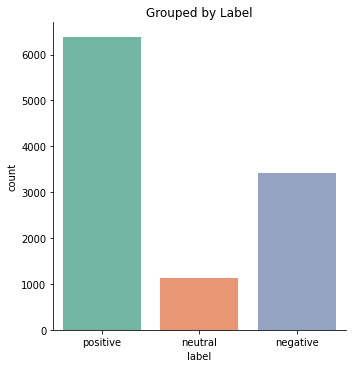

In [64]:
sns.catplot(data=df_1, x="label", kind="count", palette="Set2").set(title='Grouped by Label')

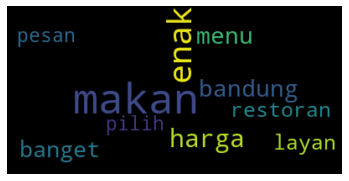

In [65]:
# Wordcloud distinct words -> using collocation
text = ' '.join(df_1['clean_text2']) #menggabungkan semua text dalam dataframe, menjadi satu string
wordcloud = WordCloud(collocations=False, max_font_size=50, max_words=10, background_color="black").generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [66]:
word_freq = df_1['clean_text2'].str.split(expand=True).stack().value_counts()
word_freq = pd.DataFrame(word_freq)
word_freq.to_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/word_freq.csv', index=True)
# CSV file downloaded and edited to give column name

In [67]:
word_freq = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/word_freq2.csv")
wf = word_freq.head(10)
wf

,word,total
0,makan,6473.0
1,enak,3598.0
2,harga,2014.0
3,bandung,1726.0
4,menu,1689.0
5,banget,1521.0
6,restoran,1278.0
7,layan,1266.0
8,pilih,1112.0
9,pesan,1075.0


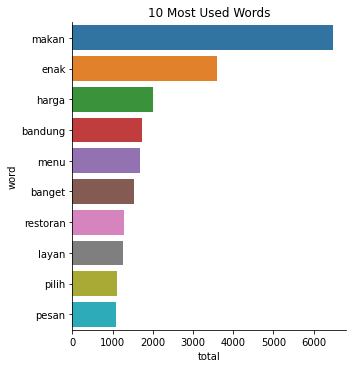

In [69]:
sns.catplot(data=wf, x="total", y="word", kind="bar").set(title='10 Most Used Words')

In [70]:
df_merge = pd.merge(
    left=word_freq,
    right=abusive,
    left_on='word',
    right_on='ABUSIVE',
    how='left'
)
filtered_df = df_merge[df_merge['ABUSIVE'].notnull()]
filtered_df = filtered_df.drop(['ABUSIVE'], axis=1)

In [71]:
filtered_df

,word,total
192,babi,147.0
274,sarap,104.0
309,anjing,92.0
420,gila,67.0
494,goblok,58.0
...,...,...
9353,bokep,1.0
9466,tuyul,1.0
9949,kontol,1.0
11604,ateis,1.0


In [72]:
abusive10 = filtered_df.head(10)
abusive10

,word,total
192,babi,147.0
274,sarap,104.0
309,anjing,92.0
420,gila,67.0
494,goblok,58.0
633,sampah,45.0
686,tolol,41.0
734,lgbt,38.0
844,hina,32.0
876,bodoh,31.0


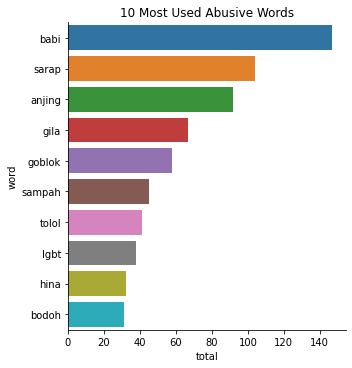

In [74]:
sns.catplot(data=abusive10, x="total", y="word", kind="bar").set(title='10 Most Used Abusive Words')

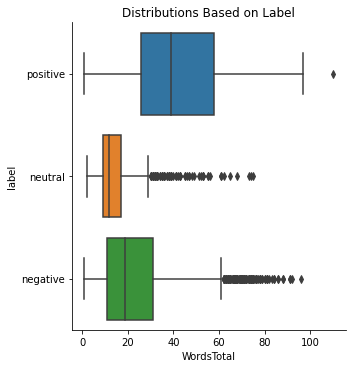

In [75]:
sns.catplot(
    data=df_1, x="WordsTotal", y="label",
    kind="box", dodge=False,
).set(title='Distributions Based on Label')